# Classification image of Fashion

## Import Library

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


## Import the Fashion MNIST dataset

- to know more about dataset you can go to this [link](https://github.com/zalandoresearch/fashion-mnist)

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Explore the data

- there are 60.000 images in training dataset with each images represent as 28 x 28 px.

In [3]:
test_labels 

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Preprocess the data

- Data harus diproses terlebih dahulu sebelum melatih jaringan. Jika Anda memeriksa gambar pertama di set pelatihan, Anda akan melihat bahwa nilai piksel berada dalam kisaran 0 hingga 255:

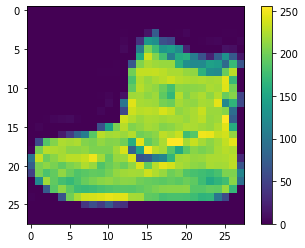

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

- Skalakan nilai-nilai ini ke kisaran 0 hingga 1 sebelum memasukkannya ke model jaringan saraf. Untuk melakukannya, bagi nilai dengan 255. Penting agar set pelatihan dan set pengujian diproses sebelumnya dengan cara yang sama:

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

- Untuk memverifikasi bahwa data dalam format yang benar dan bahwa Anda siap untuk membangun dan melatih jaringan, mari tampilkan 25 gambar pertama dari set pelatihan dan tampilkan nama kelas di bawah setiap gambar.

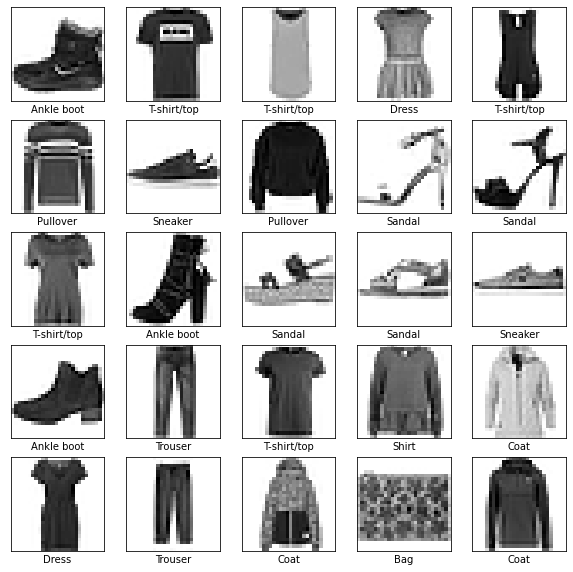

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build Model

- build model with 3 layers

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

- add additional setting in model through model.compile

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

- start training model

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5017 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3801 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3396 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3156 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2696 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2609 - accuracy: 0.9021
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2494 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

- evaluate model

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3424 - accuracy: 0.8829 - 560ms/epoch - 2ms/step

Test accuracy: 0.8828999996185303


## Predictions

- Dengan model yang terlatih, Anda dapat menggunakannya untuk membuat prediksi tentang beberapa gambar. 

- Lampirkan lapisan softmax untuk mengonversi keluaran linier model— logit —menjadi probabilitas, yang seharusnya lebih mudah diinterpretasikan.

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

- Di sini, model telah memprediksi label untuk setiap gambar dalam set pengujian. Mari kita lihat prediksi pertama:

In [18]:
predictions[0]

array([7.6423466e-06, 3.1844016e-09, 1.5532551e-07, 8.8884766e-09,
       3.3669707e-07, 2.8105252e-03, 7.5335942e-07, 7.9197988e-02,
       1.0306045e-06, 9.1798162e-01], dtype=float32)

- Prediksi adalah larik 10 angka. Mereka mewakili "keyakinan" model bahwa gambar tersebut sesuai dengan masing-masing dari 10 item pakaian yang berbeda. Anda dapat melihat label mana yang memiliki nilai kepercayaan tertinggi:

In [19]:
np.argmax(predictions[0])

9

- Jadi, modelnya paling yakin bahwa gambar ini adalah sepatu bot pergelangan kaki, atau class_names[9]. Memeriksa label uji menunjukkan bahwa klasifikasi ini benar:

## Verivy predictions

- Grafik ini untuk melihat set lengkap 10 prediksi kelas.

In [21]:

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

- Dengan model yang terlatih, Anda dapat menggunakannya untuk membuat prediksi tentang beberapa gambar.

- Mari kita lihat gambar ke-0, prediksi, dan larik prediksi. Label prediksi yang benar berwarna biru dan label prediksi yang salah berwarna merah. Angka tersebut memberikan persentase (dari 100) untuk label yang diprediksi.

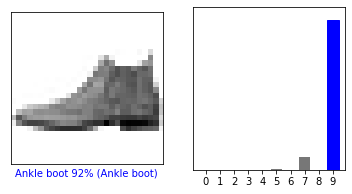

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

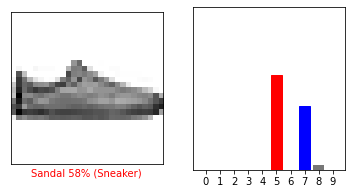

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

- Mari kita plot beberapa gambar dengan prediksi mereka. Perhatikan bahwa modelnya bisa salah bahkan ketika sangat percaya diri.

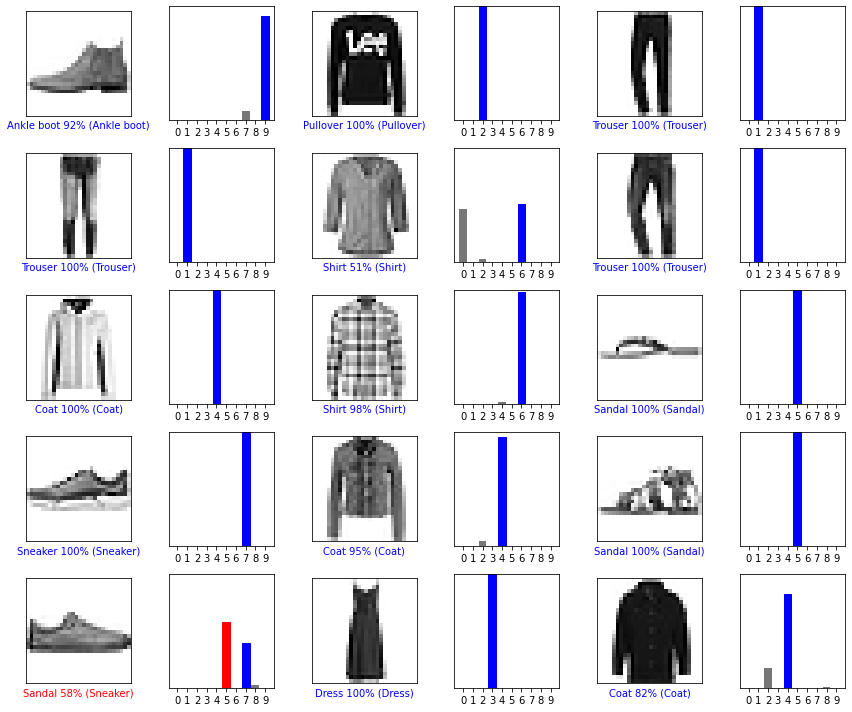

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

- Terakhir, gunakan model terlatih untuk membuat prediksi tentang satu gambar.

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


- tf.kerasmodel dioptimalkan untuk membuat prediksi pada kumpulan , atau kumpulan, contoh sekaligus. Oleh karena itu, meskipun Anda menggunakan satu gambar, Anda perlu menambahkannya ke daftar:

In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


- Sekarang prediksi label yang benar untuk gambar ini:

In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.4482870e-05 5.1248932e-15 9.9938631e-01 1.1210550e-10 5.7210797e-04
  9.5899059e-13 7.0801261e-06 1.1024747e-15 1.2944504e-10 8.7228518e-17]]


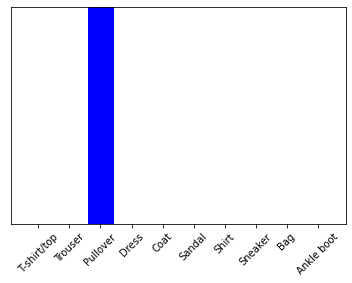

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

- tf.keras.Model.predictmengembalikan daftar daftar—satu daftar untuk setiap gambar dalam kumpulan data. Dapatkan prediksi untuk (hanya) gambar kami dalam kumpulan:

In [30]:
np.argmax(predictions_single[0])

2

- Dan model memprediksi label seperti yang diharapkan.